# **Image Operations with OpenCV and Matplotlib**

In [12]:
import cv2
from matplotlib import pyplot as plt
import numpy
import matplotlib.image as mpimg

In [13]:
import matplotlib.image as mpimg

In [14]:
img = mpimg.imread('../input/myData/rolex.jpg')


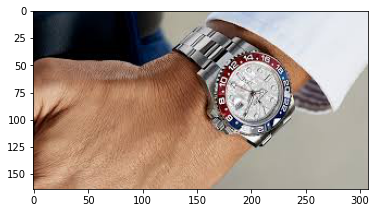

In [15]:
imgplot = plt.imshow(img)

# **Drawing and writing on image**

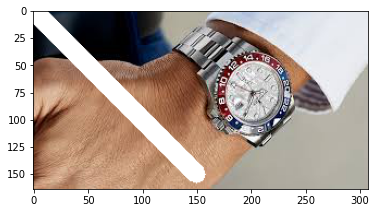

In [16]:
cv2.line(img,(0,0),(150,150),(255,255,255),15)
plt.imshow(img)

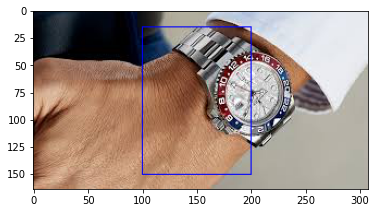

In [17]:
img = mpimg.imread('../input/myData/rolex.jpg')
cv2.rectangle(img,(100,15),(200, 150),(0,0,255),1)
plt.imshow(img)

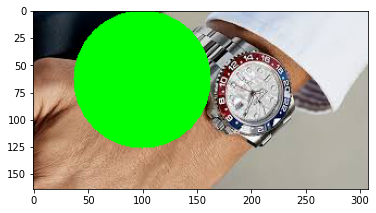

In [18]:
img = mpimg.imread('../input/myData/rolex.jpg')
cv2.circle(img,(100,63), 63, (0,255,0), -1)
plt.imshow(img)

# **Thresholding**

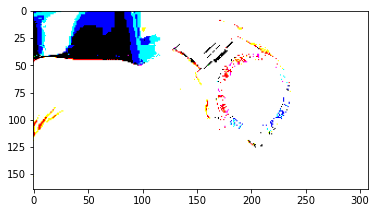

In [19]:
img = mpimg.imread('../input/myData/rolex.jpg')
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)

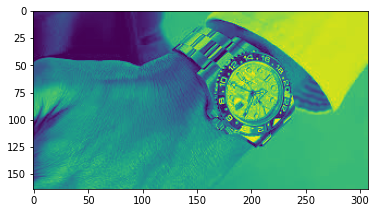

In [20]:
img = mpimg.imread('../input/myData/rolex.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# retval, threshold = cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)
plt.imshow(grayscaled)

# Color Filtering

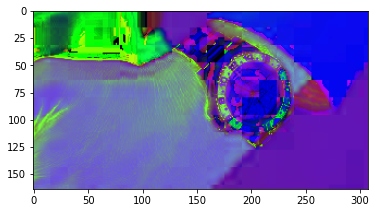

In [21]:
img = mpimg.imread('../input/myData/rolex.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)

# **Bluring and Smoothing**

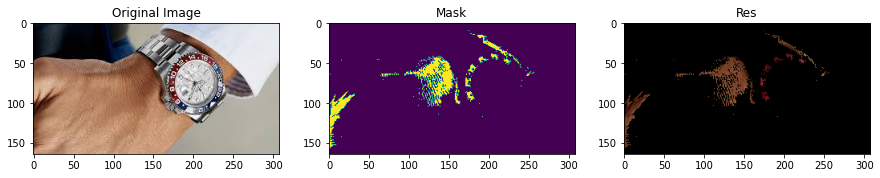

In [22]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image as mpimg

img = mpimg.imread('../input/myData/rolex.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])
    
mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img, img, mask= mask)

# plt.imshow(img)
# plt.imshow(hsv)

fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(1,3,2)
plt.title("Mask")
plt.imshow(mask)

fig.add_subplot(1,3,3)
plt.title("Res")
plt.imshow(res)
plt.show()


# **Smoothing:**
Now, let's apply a simple smoothing, where we do a sort of averaging per block of pixels. In our case, let's do a 15 x 15 square, which means we have 225 total pixels.

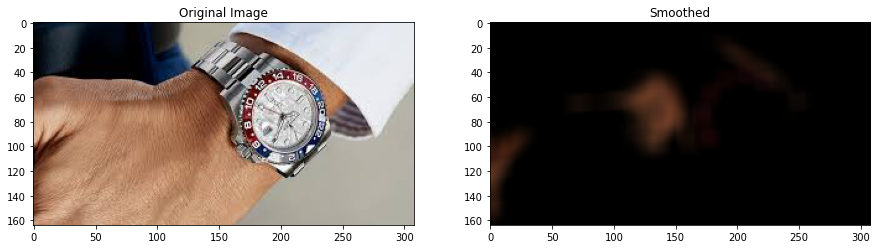

In [23]:
kernel = np.ones((15,15),np.float32)/225
smoothed = cv2.filter2D(res,-1,kernel)
# plt.imshow(smoothed)

fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(1,2,2)
plt.title("Smoothed")
plt.imshow(smoothed)
plt.show()

# Gaussian Blurring:

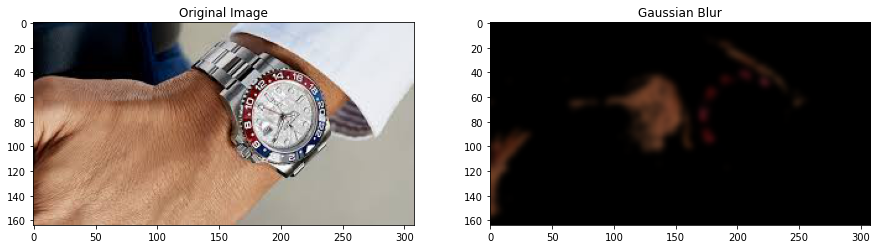

In [24]:
blur = cv2.GaussianBlur(res,(15,15),0)
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(1,2,2)
plt.title("Gaussian Blur")
plt.imshow(blur)
plt.show()

# Median Blur

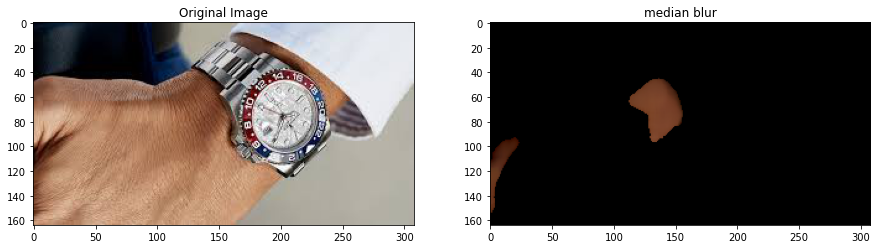

In [25]:
median = cv2.medianBlur(res,15)
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(1,2,2)
plt.title("median blur")
plt.imshow(median)
plt.show()

# bilateral blur:

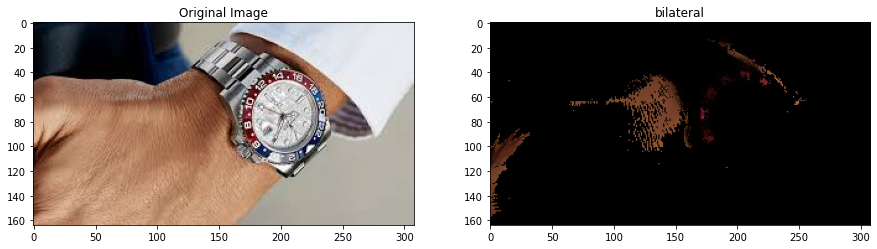

In [26]:
bilateral = cv2.bilateralFilter(res,15,75,75)
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(1,2,2)
plt.title("bilateral")
plt.imshow(bilateral)
plt.show()

# **Morphological Transformations**

**Erosion and Dilation**
These tend to come in pairs. The first pair we're going to talk about is Erosion and Dilation. Erosion is where we will "erode" the edges. The way these work is we work with a slider (kernel). We give the slider a size, let's say 5 x 5 pixels. What happens is we slide this slider around, and if all of the pixels are white, then we get white, otherwise black. This may help eliminate some white noise. The other version of this is Dilation, which basically does the opposite: Slides around, if the entire area isn't black, then it is converted to white. Here's an example:

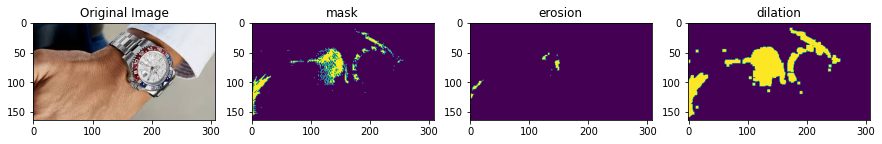

In [27]:
import cv2
import numpy as np

frame = mpimg.imread('../input/myData/rolex.jpg')

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])
    
mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(frame,frame, mask= mask)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(mask,kernel,iterations = 1)
dilation = cv2.dilate(mask,kernel,iterations = 1)
    
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.title("Original Image")
plt.imshow(frame)

fig.add_subplot(1,4,2)
plt.title("mask")
plt.imshow(mask)

fig.add_subplot(1,4,3)
plt.title("erosion")
plt.imshow(erosion)

fig.add_subplot(1,4,4)
plt.title("dilation")
plt.imshow(dilation)
plt.show()




**Opening and Closing**
The next pair is "opening" and "closing." The goal with opening is to remove "false positives" so to speak. Sometimes, in the background, you get some pixels here and there of "noise." The idea of "closing" is to remove false negatives. Basically this is where you have your detected shape, like our hat, and yet you still have some black pixels within the object. Closing will attempt to clear that up.

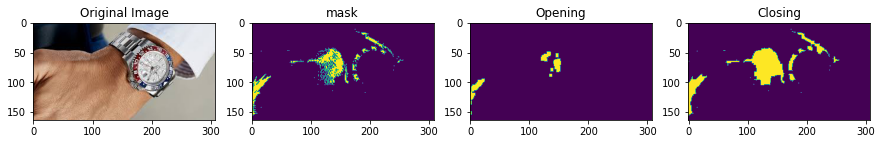

In [28]:
frame = mpimg.imread('../input/myData/rolex.jpg')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(frame,frame, mask= mask)

kernel = np.ones((5,5),np.uint8)

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.title("Original Image")
plt.imshow(frame)

fig.add_subplot(1,4,2)
plt.title("mask")
plt.imshow(mask)

fig.add_subplot(1,4,3)
plt.title("Opening")
plt.imshow(opening)

fig.add_subplot(1,4,4)
plt.title("Closing")
plt.imshow(closing)
plt.show()